In [13]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Getting historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.

In [15]:
import pandas_datareader
import datetime
import pandas_datareader.data as data

In [16]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [17]:
tesla = data.DataReader("TSLA", "yahoo", start, end)

In [18]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [19]:
# Getting# Getting historical stock information for Ford from Jan 1, 2012 to Jan 1, 2017.

In [20]:
ford = data.DataReader("F", "yahoo", start, end)

In [21]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [22]:
# Getting historical stock information for GM from Jan 1, 2012 to Jan 1, 2017.

In [23]:
gm = data.DataReader("GM", "yahoo", start, end)

In [24]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


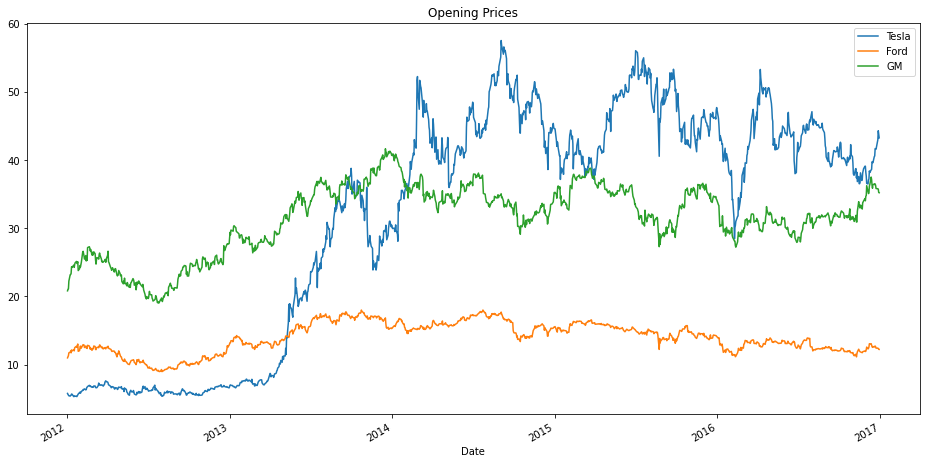

In [25]:
# PLot the open prices

tesla["Open"].plot(label = "Tesla", figsize = (16,8), title = "Opening Prices")
ford["Open"].plot(label = "Ford")
gm["Open"].plot(label = "GM")
plt.legend()

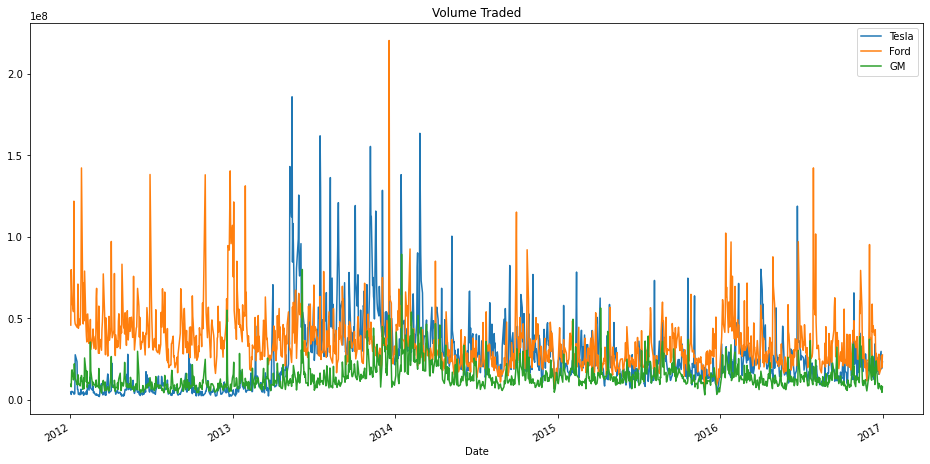

In [26]:
# Plot volume

tesla["Volume"].plot(label = "Tesla", figsize = (16,8), title = "Volume Traded")
ford["Volume"].plot(label = "Ford")
gm["Volume"].plot(label = "GM")
plt.legend()

In [27]:
# Finding the date of Ford's biggest spike

ford["Volume"].idxmax()

Timestamp('2013-12-18 00:00:00')

In [28]:
# Create colund "Total Traded", which is the Open Price multiplied by the Volume Traded

tesla["Total Traded"] = tesla["Open"] * tesla["Volume"]
ford["Total Traded"] = ford["Open"] * ford["Volume"]
gm["Total Traded"] = gm["Open"] * gm["Volume"]

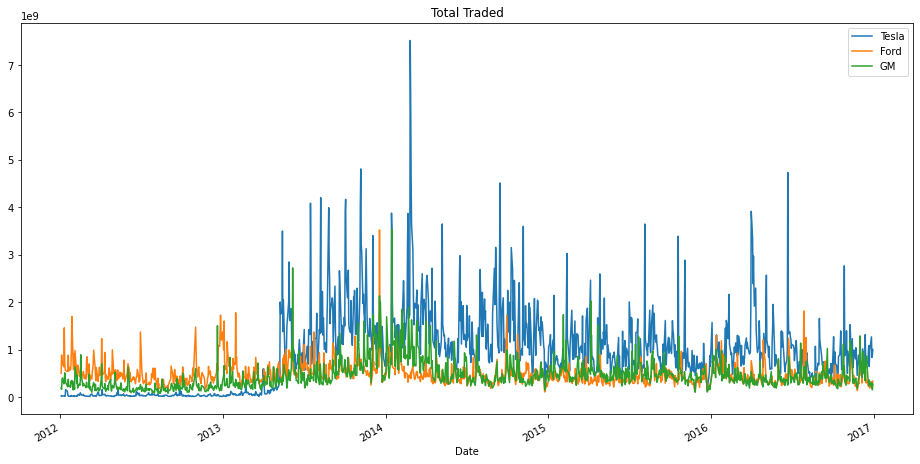

In [29]:
# Plot Total Traded against time index

tesla["Total Traded"].plot(label = "Tesla", figsize = (16, 8), title = "Total Traded")
ford["Total Traded"].plot(label = "Ford")
gm["Total Traded"].plot(label = "GM")
plt.legend()

In [30]:
# Finding the date that the most amount traded for Tesla

tesla["Total Traded"].idxmax()

Timestamp('2014-02-25 00:00:00')

<AxesSubplot:xlabel='Date'>

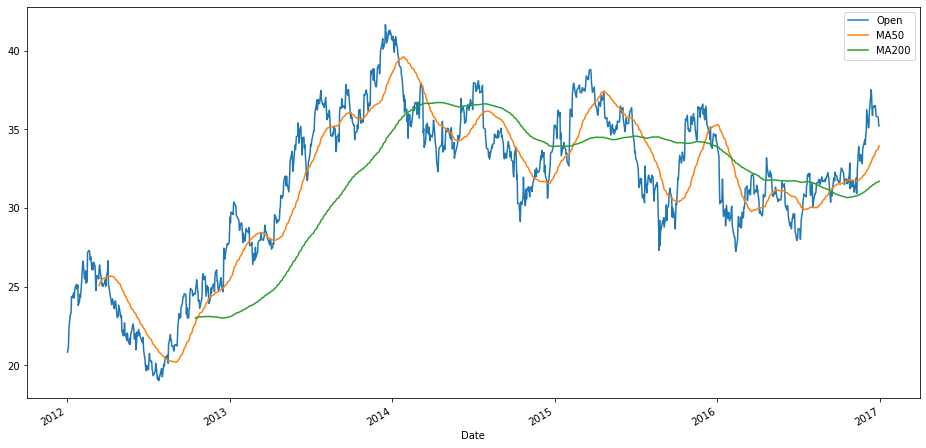

In [31]:
# Plot out the (Moving Average) MA50 and MA200 for GM

gm["MA50"] = gm["Open"].rolling(50).mean()
gm["MA200"] = gm["Open"].rolling(200).mean()
gm[["Open", "MA50", "MA200"]].plot(figsize = (16, 8))

In [32]:
# Find relationship between these stocks using Scatter Matrix

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
companies = pd.concat([tesla["Open"], ford["Open"], gm["Open"]], axis = 1)
companies.columns = ["Tesla Open", "Ford Open", "GM Open"]
companies.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>]], dtype=object)

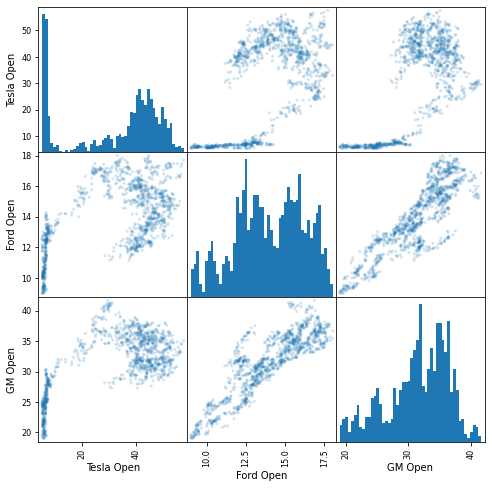

In [35]:
scatter_matrix(companies, figsize = (8, 8), alpha = 0.2, hist_kwds = {"bins": 50})

In [36]:
# There is a positive correlation between Ford and GM, beacause their price stays at the same level in comparison
# Tesla is different, because of it's stock price jump

In [67]:
# Candlestick Charts
# get help from `https://matplotlib.org/1.5.3/examples/pylab_examples/finance_demo.html`

In [38]:
# Create Candlestick chart for Fordin January 2012 (too many dates won't look good)

In [58]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY 

In [42]:
ford_reset = ford.loc["2012-01"].reset_index()
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   High          20 non-null     float64       
 2   Low           20 non-null     float64       
 3   Open          20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Adj Close     20 non-null     float64       
 7   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.4 KB


In [43]:
ford_reset["date_ax"] = ford_reset["Date"].apply(lambda date: date2num(date))

In [45]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,15342.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,15343.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,15344.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,15345.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,15348.0


In [53]:
ford_values = [tuple(vals) for vals in ford_reset[["date_ax", "Open", "High", "Low", "Close"]].values]

In [54]:
ford_values

[(15342.0, 11.0, 11.25, 10.989999771118164, 11.130000114440918),
 (15343.0,
  11.149999618530273,
  11.529999732971191,
  11.069999694824219,
  11.300000190734863),
 (15344.0,
  11.329999923706055,
  11.630000114440918,
  11.239999771118164,
  11.59000015258789),
 (15345.0,
  11.739999771118164,
  11.800000190734863,
  11.520000457763672,
  11.710000038146973),
 (15348.0,
  11.829999923706055,
  11.949999809265137,
  11.699999809265137,
  11.800000190734863),
 (15349.0, 12.0, 12.050000190734863, 11.630000114440918, 11.800000190734863),
 (15350.0,
  11.739999771118164,
  12.180000305175781,
  11.649999618530273,
  12.069999694824219),
 (15351.0,
  12.15999984741211,
  12.180000305175781,
  11.890000343322754,
  12.140000343322754),
 (15352.0,
  12.010000228881836,
  12.079999923706055,
  11.84000015258789,
  12.039999961853027),
 (15356.0,
  12.199999809265137,
  12.260000228881836,
  11.960000038146973,
  12.020000457763672),
 (15357.0, 12.029999732971191, 12.369999885559082, 12.0, 12.

In [59]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter("%b %d")
dayFormatter = DateFormatter("d")

([<matplotlib.lines.Line2D at 0x1f17c1dcb80>,
  <matplotlib.patches.Rectangle at 0x1f17c8f1d90>])

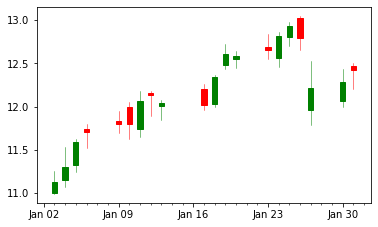

In [66]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width = 0.5, colorup = "g", colordown = "r")